# Credit Card Customer Churn Prediction

Problem Statement:

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

Data Source : 
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

The dataset consists of records of 10,127 bank customers (rows) and 20 columns describing various features viz.- 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'. We have both categorical as well as numerical features. We select the best of these features and model customer attrition behaviour using these features. Such a prediction system can act as an early warning system for the bank and incentivize them to do the needful to retain customers.


Columns:

Clientnum Num Client number. Unique identifier for the customer holding the account
Attrition_Flag char Internal event (customer activity) variable
Customer_Age Num Demographic variable - Customer's Age in Years
Gender Char Demographic variable - M=Male, F=Female
Dependent_count Num Demographic variable - Number of people dependents
Education_Level Char Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
Marital_Status Char Demographic variable - Married, Single, Unknown
Income_Category Char Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, > 120K, Unknown)
Card_Category Char Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
Months_on_book Num Months on book (Time of Relationship)
Total_Relationship_Count Num Total no. of products held by the customer
Months_Inactive_12_mon Num No. of months inactive in the last 12 months
Contacts_Count_12_mon Num No. of Contacts in the last 12 months
Credit_Limit Num Credit Limit on the Credit Card
Total_Revolving_Bal Num Total Revolving Balance on the Credit Card
Avg_Open_To_Buy Num Open to Buy Credit Line (Average of last 12 months)
Total_Amt_Chng_Q4_Q1 Num Change in Transaction Amount (Q4 over Q1)
Total_Trans_Amt Num Total Transaction Amount (Last 12 months)
Total_Trans_Ct Num Total Transaction Count (Last 12 months)
Total_Ct_Chng_Q4_Q1 Num Change in Transaction Count (Q4 over Q1)
Avg_Utilization_Ratio Num Average Card Utilization Ratio

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_validate,StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

# DATA 

In [35]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [36]:
df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],inplace=True,axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
df.drop_duplicates()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# EDA

In [8]:
df.shape

(10127, 20)

# Gender Distribution

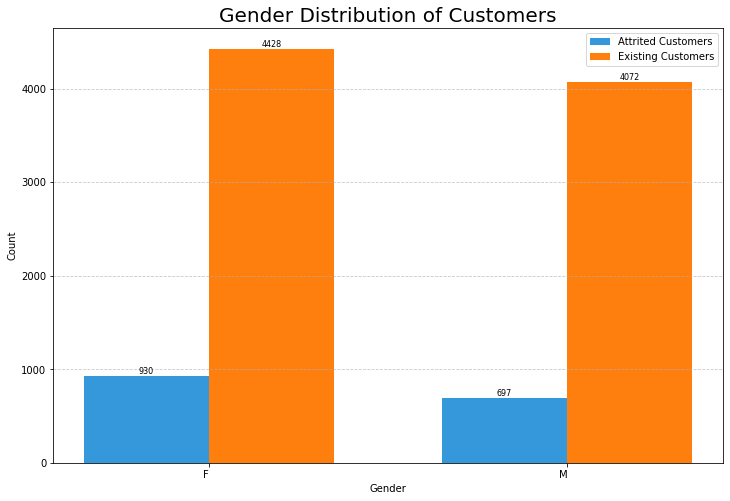

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']['Gender'].value_counts()
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']['Gender'].value_counts()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.35

# Create an array for x-axis positions
x = np.arange(len(attrited_customers))

# Create bars for both customer types
bar1 = ax.bar(x - bar_width/2, attrited_customers, width=bar_width, label='Attrited Customers', color='#3498db')
bar2 = ax.bar(x + bar_width/2, existing_customers, width=bar_width, label='Existing Customers', color='#ff7f0e')


# Add data labels on top of each bar
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8)

# Add labels and title
ax.set_title("Gender Distribution of Customers",fontsize=20)
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.legend()

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(attrited_customers.index, rotation=0, ha='right')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()



# Education Level

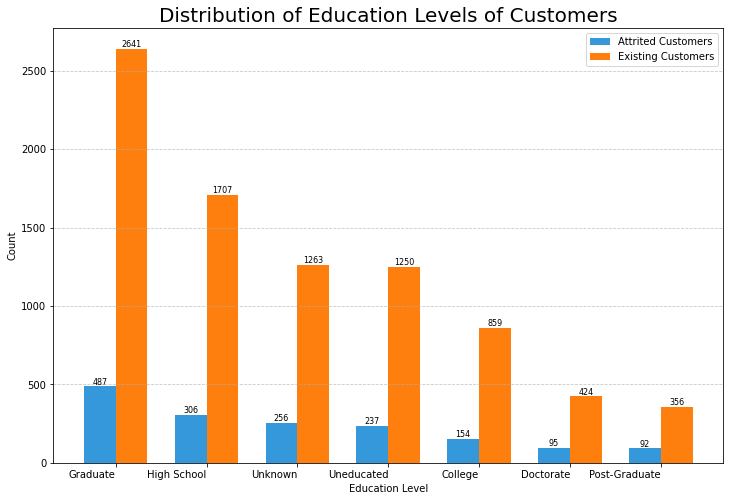

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']['Education_Level'].value_counts()
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']['Education_Level'].value_counts()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Bar width
bar_width = 0.35

# Create an array for x-axis positions
x = np.arange(len(attrited_customers))

# Create bars for both customer types
bar1 = ax.bar(x - bar_width/2, attrited_customers, width=bar_width, label='Attrited Customers', color='#3498db')
bar2 = ax.bar(x + bar_width/2, existing_customers, width=bar_width, label='Existing Customers', color='#ff7f0e')


# Add data labels on top of each bar
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8)

# Add labels and title
ax.set_title("Distribution of Education Levels of Customers",fontsize=20)
ax.set_xlabel("Education Level")
ax.set_ylabel("Count")
ax.legend()

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(attrited_customers.index, rotation=0, ha='right')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Card type 

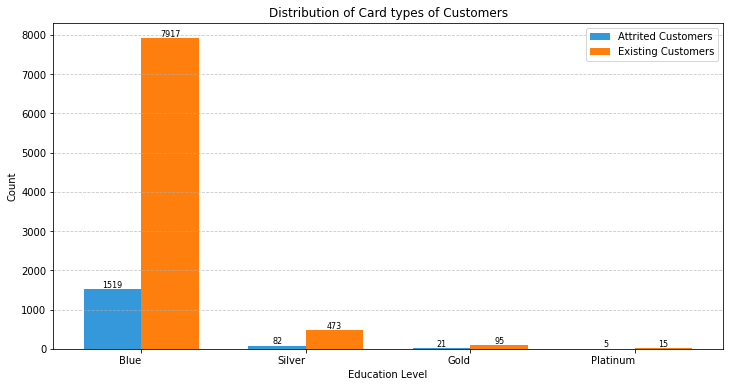

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']['Card_Category'].value_counts()
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']['Card_Category'].value_counts()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Create an array for x-axis positions
x = np.arange(len(attrited_customers))

# Create bars for both customer types
bar1 = ax.bar(x - bar_width/2, attrited_customers, width=bar_width, label='Attrited Customers', color='#3498db')
bar2 = ax.bar(x + bar_width/2, existing_customers, width=bar_width, label='Existing Customers', color='#ff7f0e')


# Add data labels on top of each bar
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8)

# Add labels and title
ax.set_title("Distribution of Card types of Customers")
ax.set_xlabel("Education Level")
ax.set_ylabel("Count")
ax.legend()

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(attrited_customers.index, rotation=0, ha='right')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Income Distribution

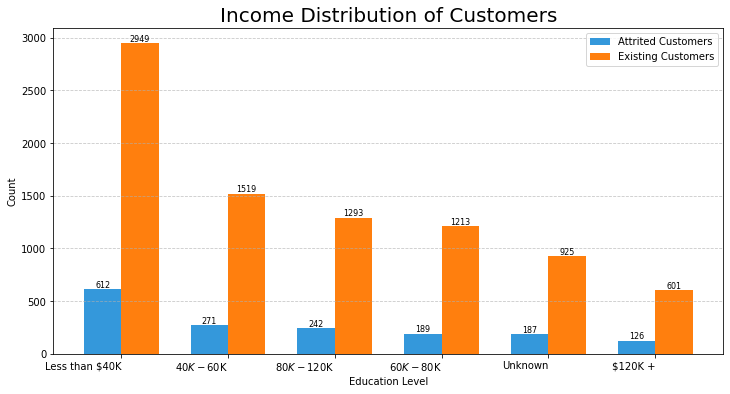

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']['Income_Category'].value_counts()
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']['Income_Category'].value_counts()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Bar width
bar_width = 0.35

# Create an array for x-axis positions
x = np.arange(len(attrited_customers))

# Create bars for both customer types
bar1 = ax.bar(x - bar_width/2, attrited_customers, width=bar_width, label='Attrited Customers', color='#3498db')
bar2 = ax.bar(x + bar_width/2, existing_customers, width=bar_width, label='Existing Customers', color='#ff7f0e')


# Add data labels on top of each bar
for bars in [bar1, bar2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom', fontsize=8)

# Add labels and title
ax.set_title("Income Distribution of Customers",fontsize=20)
ax.set_xlabel("Education Level")
ax.set_ylabel("Count")
ax.legend()

# Set x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(attrited_customers.index, rotation=0, ha='right')

# Add gridlines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


# Age Distribution

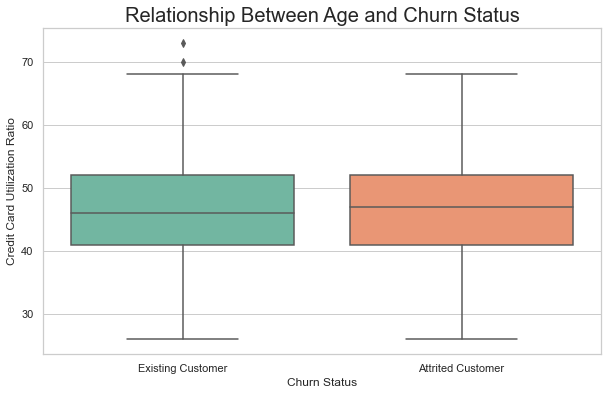

In [13]:
# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition_Flag', y='Customer_Age', palette=colors)

# Customize the plot
plt.title('Relationship Between Age and Churn Status',fontsize=20)
plt.xlabel('Churn Status')
plt.ylabel('Credit Card Utilization Ratio')
plt.show()



# Credit_Limit of Customers

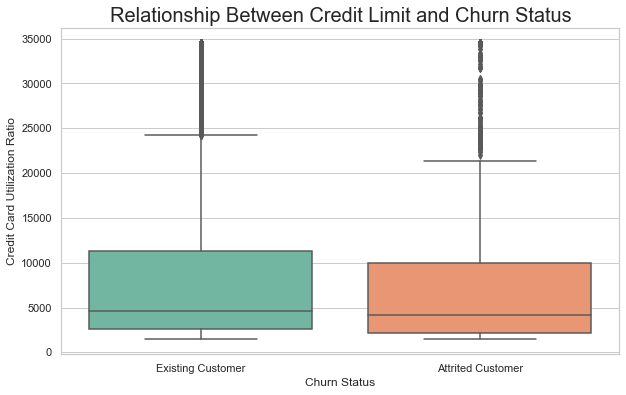

In [14]:
# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition_Flag', y='Credit_Limit', palette=colors)

# Customize the plot
plt.title('Relationship Between Credit Limit and Churn Status',fontsize=20)
plt.xlabel('Churn Status')
plt.ylabel('Credit Card Utilization Ratio')
plt.show()


# Months on Book

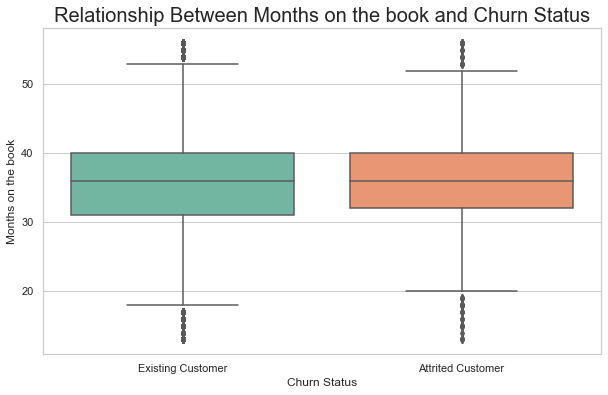

In [15]:

sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition_Flag', y='Months_on_book', palette=colors)

plt.title('Relationship Between Months on the book and Churn Status',fontsize=20)
plt.xlabel('Churn Status')
plt.ylabel('Months on the book')
plt.show()


# Credit Card Utilization Ratio

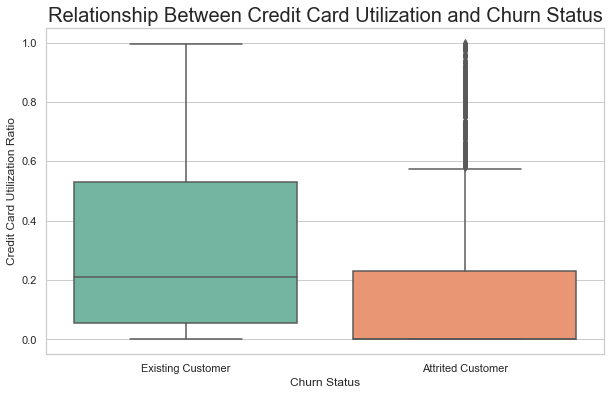

In [16]:

sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition_Flag', y='Avg_Utilization_Ratio', palette=colors)

plt.title('Relationship Between Credit Card Utilization and Churn Status',fontsize=20)
plt.xlabel('Churn Status')
plt.ylabel('Credit Card Utilization Ratio')
plt.show()


# Number of Contacts with customers in 1 Year

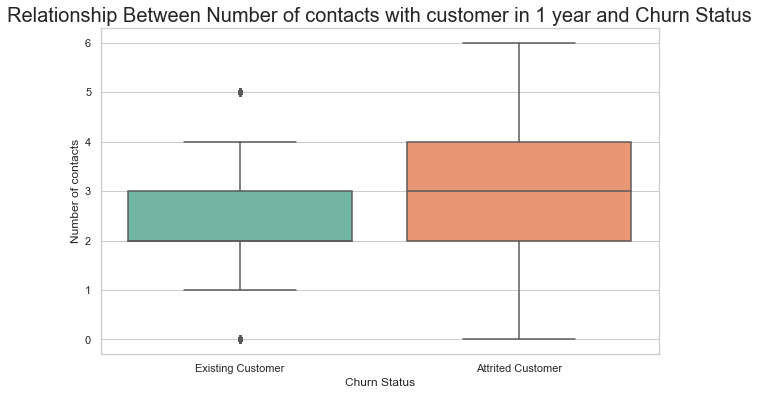

In [17]:
# Set the style and color palette
sns.set(style="whitegrid")
colors = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Attrition_Flag', y='Contacts_Count_12_mon', palette=colors)

plt.title('Relationship Between Number of contacts with customer in 1 year and Churn Status',fontsize=20)
plt.xlabel('Churn Status')
plt.ylabel('Number of contacts')
plt.show()


# Data Preprocessing

In [18]:
df1 = df.copy()

In [19]:
catcols= []
numcols = []
for column in df.columns:
    if df1[column].dtype == 'object':
        catcols.append(column)
    elif df1[column].dtype in ['int64', 'float64']:
        numcols.append(column)

print(catcols)
print("Number of categorical columns: ", len(catcols))
print()
print(numcols)
print("Number of Numerical columns: ", len(numcols))

['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Number of categorical columns:  6

['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
Number of Numerical columns:  14


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import cross_validate,StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

In [21]:


le = LabelEncoder()

df1['Attrition_Flag'] = le.fit_transform(df1['Attrition_Flag'])
df1['Marital_Status'] = le.fit_transform(df1['Marital_Status'])
df1['Gender'] = le.fit_transform(df1['Gender'])


In [22]:
education_level = {  
    'Unknown': 0,'Uneducated': 1,'High School': 2,'College': 3,'Graduate': 4,'Post-Graduate': 5,'Doctorate': 6
    } 

income_category = {
    'Unknown': 0,'Less than $40K': 1,'$40K - $60K': 2,'$60K - $80K': 3,'$80K - $120K': 4,'$120K +': 5
    }

card_category = {
    'Blue': 0,'Silver': 1,'Gold': 2,'Platinum': 3
}

df1['Education_Level'] = df1['Education_Level'].map(education_level)

df1['Income_Category'] = df1['Income_Category'].map(income_category)

df1['Card_Category'] = df1['Card_Category'].map(card_category)

df1.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,2,1,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,4,2,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,4,1,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,2,3,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,1,1,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [23]:
x = df1.drop(['Attrition_Flag'],axis=1)
y= df1['Attrition_Flag']

In [24]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [25]:
print("Training Features shape",X_train.shape)
print("Testing Features shape",X_test.shape)
print("Training Label shape",y_train.shape)
print("Testing Label shape",y_test.shape)

y_train.value_counts()

Training Features shape (8101, 19)
Testing Features shape (2026, 19)
Training Label shape (8101,)
Testing Label shape (2026,)


1    6801
0    1300
Name: Attrition_Flag, dtype: int64

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [27]:
print("Shape after over sampling \n")

print("Training Features shape",X_train.shape)
print("Testing Features shape",X_test.shape)
print("Training Label shape",y_train.shape)
print("Testing Label shape",y_test.shape)

y_train.value_counts()

Shape after over sampling 

Training Features shape (13602, 19)
Testing Features shape (2026, 19)
Training Label shape (13602,)
Testing Label shape (2026,)


1    6801
0    6801
Name: Attrition_Flag, dtype: int64

In [28]:
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_validate,StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
models = [("Logistic Regression",LogisticRegression(random_state=0)),
          ("Support Vector Machine",SVC(random_state=0)),
          ("Decision Tree",DecisionTreeClassifier(random_state=0)),
            ("Random Forest",RandomForestClassifier(random_state=0)),
             ("Gradient Boosting",GradientBoostingClassifier(random_state=0))]

results=[]

mean_accuracy_score = []

classifiers = []

for model_name, model in models:
    
    steps = [('classifier', model)]
    
    pipeline = Pipeline(steps=steps)
                        
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    cv_results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1, return_train_score=True)
    
    print(f"Cross-validation completed successfully for {model_name} \n")

    results.append({
        "Model Name": model_name,
        "Mean Train Accuracy": np.mean(cv_results['train_score']),
        "Mean Test Accuracy": np.mean(cv_results['test_score'])
    })
    
    mean_accuracy_score.append(np.mean(cv_results['test_score']))
    classifiers.append(model_name)

results_df = pd.DataFrame(results)

results_df

Cross-validation completed successfully for Logistic Regression 

Cross-validation completed successfully for Support Vector Machine 

Cross-validation completed successfully for Decision Tree 

Cross-validation completed successfully for Random Forest 

Cross-validation completed successfully for Gradient Boosting 



,Model Name,Mean Train Accuracy,Mean Test Accuracy
0,Logistic Regression,0.819493,0.819513
1,Support Vector Machine,0.739377,0.738642
2,Decision Tree,1.000000,0.949787
3,Random Forest,1.000000,0.975739
4,Gradient Boosting,0.973166,0.965226


Training the best Model

In [31]:
re = RandomForestClassifier(random_state=0)
re.fit(X_train,y_train)

y_pred = re.predict(X_test)

In [32]:
print("Model :Random Forest Classifier \n")

print("Accuracy Score",accuracy_score(y_test,y_pred))
print("ROC AUC Score",roc_auc_score(y_test,y_pred))

print("\n Classification Report \n",classification_report(y_test,y_pred))


Model :Random Forest Classifier 

Accuracy Score 0.9605133267522211
ROC AUC Score 0.9332400962609774

 Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       327
           1       0.98      0.97      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



<AxesSubplot:>

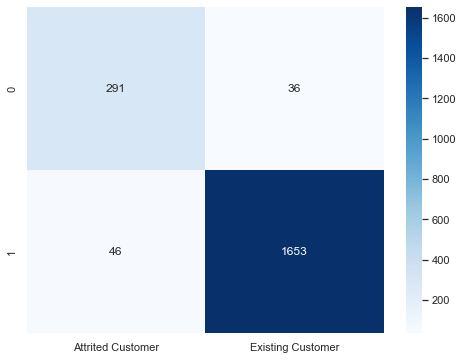

In [71]:
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=['Attrited Customer','Existing Customer'])

Hyperparameter Tuning 

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
re.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [85]:
param = {
    "n_estimators": [50, 100, 150, 200], # number of trees in the forest 
    'max_features': ['auto', 'sqrt', 'log2'], # max features to consider when looking for the best split
    "max_depth": [1, 3, 5, 7, 9], # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves 
                                  # contain less than min_samples_split samples.
    "criterion": ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=re, param_grid=param, cv=5, scoring='accuracy', n_jobs=-1,
                           return_train_score=True)

# Fit the pipeline with GridSearch to the data
grid_search.fit(x, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'auto', 'n_estimators': 200}
Best Score: 0.9181389589655466


In [86]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=200,
                       random_state=0)